In [78]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

In [79]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [80]:
print(x_train.shape,x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [81]:
fashion_mnist_labels = ["T-shirt/top", 
                        "Trouser",    
                        "Pullover",    
                        "Dress",      
                        "Coat",       
                        "Sandal",     
                        "Shirt",        
                        "Sneaker",     
                        "Bag",         
                        "Ankle boot"]

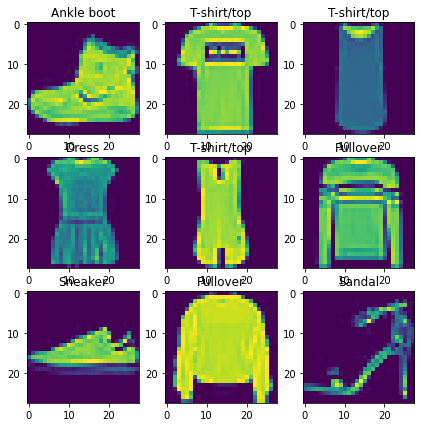

In [83]:
plt.figure(figsize=(7,7))
for i in range(9):
  plt.subplot(331+i)
  plt.imshow(x_train[i])
  plt.title(fashion_mnist_labels[y_train[i]])
plt.show()  

In [ ]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
from tensorflow.keras.layers import Conv2D,Dense,Flatten,Dropout,MaxPool2D
from tensorflow.keras.models import Sequential

In [ ]:
model=Sequential([
                  Conv2D(64,(3,3),padding='same',activation='relu',input_shape=(28,28,1)),
                  MaxPool2D(),
                  Dropout(0.2),
                  Conv2D(32,(3,3),padding='same',activation='relu'),
                  MaxPool2D(),
                  Dropout(0.1),
                  Flatten(),
                  Dense(256,activation='relu'),
                  Dropout(0.2),
                  Dense(10,activation='softmax')

])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1568)             

In [ ]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,optimizer=tf.keras.optimizers.RMSprop(),metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,batch_size=1000,epochs=10,validation_split=0.2)

In [67]:
pred=model.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [73]:
fashion=[fashion_mnist_labels[x] for x in pred]
fashion[:10]

['Ankle boot',
 'Pullover',
 'Trouser',
 'Trouser',
 'T-shirt/top',
 'Trouser',
 'Coat',
 'Shirt',
 'Sandal',
 'Sneaker']

In [50]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [53]:
fashion_mnist_labels[0]

'T-shirt/top'

In [60]:
t1=x_test[0].reshape(-1,28,28,1)

In [63]:
fashion_mnist_labels[model.predict_classes(t1)[0]]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


'Ankle boot'

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Ankle boot


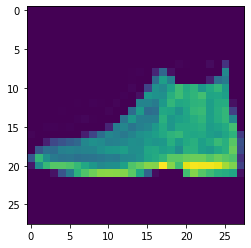

In [76]:
print(fashion_mnist_labels[model.predict_classes(t1)[0]])
plt.imshow(x_test[0].reshape(28,28))
plt.show()